In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-1-ac09909db896>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Data

In [3]:
br_pd = pd.read_csv('output/br.csv')

In [4]:
score_pd = pd.read_csv('output/score.csv')

In [5]:
score_pd

,userid,score,class
0,4e3519d7eafbfccdae231756fcf2ce9c,79,a
1,379bbc4c2c728db0a249e8c4e6b621af,100,a
2,1361825bdeb54e5153e74389df8a2a10,65,a
3,4f9f1b81a07e3a192853ab1099a68fca,81,a
4,479e88f02385c56f386d07d59f02a3b2,75,a
...,...,...,...
114,93229bfed1b03a573e6139c21fc4e5c7,73,b
115,f5e00dfd7cb43f85c86dd5373da9516c,3,b
116,7ba601138e531ca65131aaafdd0b0fca,81,b
117,64d3bd3b339f63a66b8c878b561551d8,79,b


In [6]:
sill_pd = pd.read_csv('output/sill.csv')

In [7]:
viscode_pd = pd.read_csv('output/viscode.csv')

In [8]:
engagement_pre_pd = pd.read_csv('output/engagement_pre.csv')

In [9]:
engagement_post_pd = pd.read_csv('output/engagement_post.csv')

### 1-1. Test data

In [10]:
uid = 'b1dfc5c6ec04d46d1823c5fa972ad320'

In [11]:
br_pd[br_pd['userid']==uid]

,userid,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,...,NEXT,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,REGIST CONTENTS,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
84,b1dfc5c6ec04d46d1823c5fa972ad320,0,227,21,0,0,31,0,59,0,...,1500,0,86,0,3,832,0,0,0,0


In [12]:
score_pd[score_pd['userid']==uid]

,userid,score,class
13,b1dfc5c6ec04d46d1823c5fa972ad320,99,a


In [13]:
sill_pd[sill_pd['userid']==uid]

,userid,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_39,s_40,s_41,s_42,s_43,s_44,s_45,s_46,s_47,s_48
0,b1dfc5c6ec04d46d1823c5fa972ad320,5,5,5,5,1,1,5,1,5,...,5,1,1,5,5,5,1,1,1,5


In [14]:
viscode_pd[viscode_pd['userid']==uid]

,userid,code_length,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AttributeError,ConversionError,...,ModuleNotFoundError,NameError,OperationalError,SyntaxError,TabError,TypeError,UnboundLocalError,UnicodeDecodeError,ValueError,ZeroDivisionError
59,b1dfc5c6ec04d46d1823c5fa972ad320,99,31,61,19,229,1,1,1.0,0.0,...,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
engagement_pre_pd[engagement_pre_pd['userid']==uid]

,userid,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,...,e_16,e_17,e_18,e_19,e_20,e_21,e_22,e_23,e_24,e_25
38,b1dfc5c6ec04d46d1823c5fa972ad320,4,5,1,5,4,3,3,5,2,...,5,5,5,5,5,1,5,4,2,4


In [16]:
engagement_post_pd[engagement_post_pd['userid']==uid]

,userid,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,...,e_16,e_17,e_18,e_19,e_20,e_21,e_22,e_23,e_24,e_25
53,b1dfc5c6ec04d46d1823c5fa972ad320,4,5,1,5,3,1,3,5,2,...,3,5,5,5,5,1,3,5,4,5


In [17]:
engagement_post_pd.shape

(102, 26)

In [18]:
engagement_pre_pd.shape

(116, 26)

In [19]:
engagement_intersection =  set(engagement_post_pd['userid']) & set(engagement_post_pd['userid'])

engagement_pd = pd.DataFrame()

for user_id in engagement_intersection:

    post = engagement_post_pd[engagement_post_pd['userid'] == user_id].reset_index(drop=True).drop(['userid'], axis=1)
    pre = engagement_pre_pd[engagement_pre_pd['userid'] == user_id].reset_index(drop=True).drop(['userid'], axis=1)
    
    diff = post - pre
    diff['userid'] = user_id
    
    engagement_pd = pd.concat([engagement_pd, diff], ignore_index=True)
    
engagement_pd = engagement_pd.dropna()

### 1-2. Data characteristics

In [20]:
score_pd.nunique()

userid    119
score      47
class       2
dtype: int64

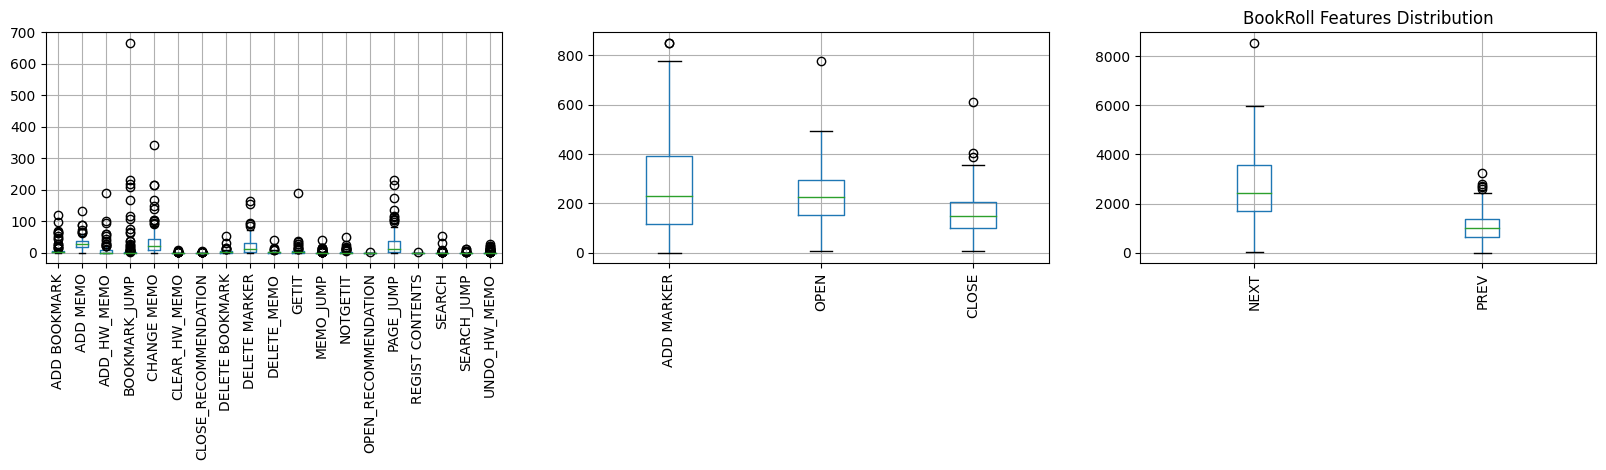

In [21]:
plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
br_pd.drop(['NEXT', 'PREV', 'ADD MARKER', 'OPEN', 'CLOSE'], axis=1).boxplot()
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
br_pd[['ADD MARKER', 'OPEN', 'CLOSE']].boxplot()
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
br_pd[['NEXT', 'PREV']].boxplot()
plt.xticks(rotation=90)

plt.title('BookRoll Features Distribution')

plt.show()

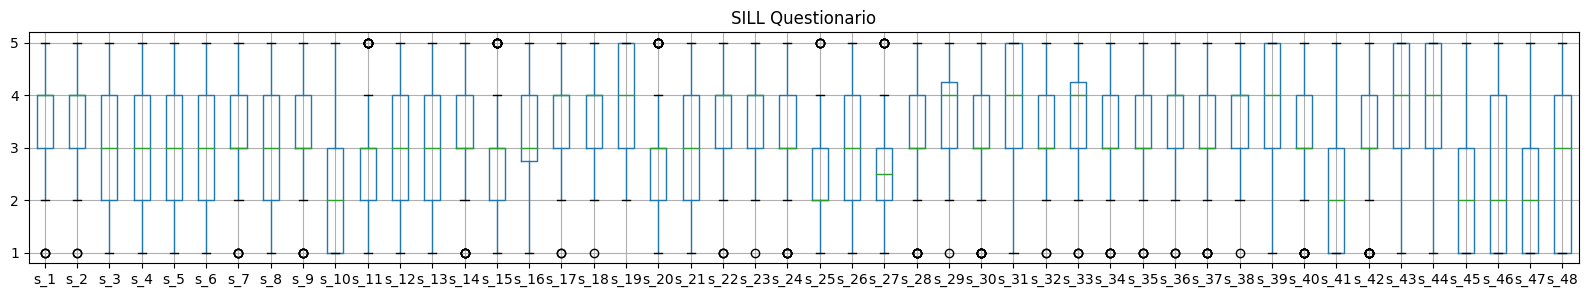

In [22]:
# sill_pd.nunique()

plt.figure(figsize=(20, 3))
sill_pd.boxplot()
plt.title('SILL Questionario')
plt.show()

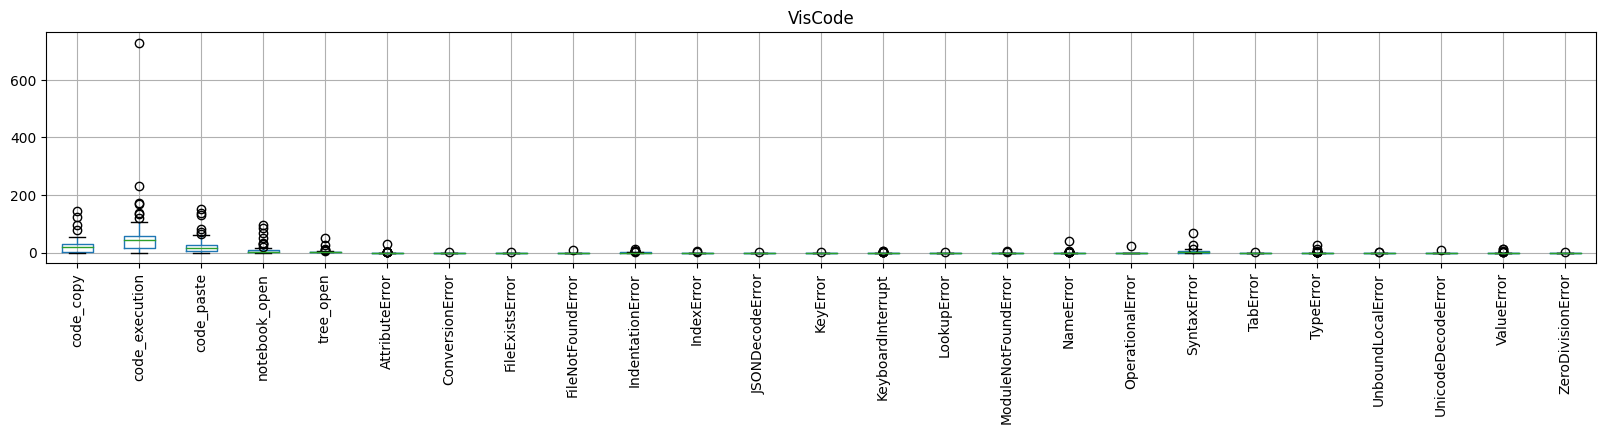

In [23]:
plt.figure(figsize=(20, 3))
viscode_pd.drop(['code_length', 'code_speed'], axis=1).boxplot()

# plt.yscale('log')
plt.xticks(rotation=90)
plt.title('VisCode')
# plt.ylim(bottom=0)
plt.show()

### 1-3. Merge Data sets

In [24]:
score_pd = score_pd.set_index('userid')
sill_pd = sill_pd.set_index('userid')
viscode_pd = viscode_pd.set_index('userid')
br_pd = br_pd.set_index('userid')
engagement_pd = engagement_pd.set_index('userid')

In [25]:
# br_grouped = br_pd.groupby(['username', 'operation_name']).size().reset_index()
# br_grouped = br_grouped.pivot_table(0, ['username'], 'operation_name').fillna(0).astype('int')
# br_grouped

In [26]:
merged_pd = pd.concat([br_pd, sill_pd, viscode_pd, engagement_pd, score_pd], axis=1)
merged_pd = merged_pd.drop(columns=['REGIST CONTENTS'])

merged_pd = merged_pd[merged_pd['score'].notna()]
merged_pd = merged_pd.dropna()

In [28]:
print)

SyntaxError: unmatched ')' (<ipython-input-28-83d2c128485f>, line 1)

## 2. Simple Label Prediction

## 2. Data statistics

### 2-1. Correlation matrix

In [ ]:
import matplotlib.pyplot as plt

# plt.matshow(merged_pd.corr())
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')
# plt.show()

In [ ]:
np.random.seed(124)
Correlazioni = pd.DataFrame(np.random.rand(7, 10), columns=[*'abcdefghij'])

plt.figure(figsize=(50, 20))
corr = merged_pd.corr()
# corr = corr_pd

# annot = [[f"{val[0]:.2f}"
#           + ('*' if val[1] < 0.1 else '')  # add one star if abs(val) >= extreme_1
#           + ('*' if val[1] < 0.05 else '')  # add one star if abs(val) >= extreme_1
#           + ('*' if val[1] < 0.005 else '')  # add one star if abs(val) >= extreme_1

#           for val in zip(row[0], row[1])] for row in zip(corr.to_numpy(), corr_pd_p.to_numpy())]


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
extreme_1 = 1  # show with a star
extreme_2 = 2  # show with a second star
extreme_3 = 3  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]
#     annot = pd.DataFrame(annot).iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.2f}"
          + ('' if abs(val) < extreme_1 else '\n*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '*')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '*')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1,linecolor='gray')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

heatmap.set_xlabel('BookRoll Component')
heatmap.set_ylabel('SILL Component')

plt.savefig('figures/000_correlation_matrix.png', dpi=300)

plt.show()

### 2-2. Score dist

In [ ]:
class_pd = br_pd.groupby(['userid', 'class']).count().reset_index()[['userid', 'class']].set_index('userid')
class_pd.loc[[uid]]

In [ ]:
# pd.concat([class_pd, merged_pd], axis=1)
merged_pd.loc[[uid]]

In [ ]:
merged_pd = merged_pd.join(class_pd)

In [ ]:
plt.figure(figsize=(10, 3))
merged_pd[merged_pd['class']=='a']['score'].hist(bins=10)

plt.ylabel('Numbers')
plt.xlabel('Score')

In [ ]:
plt.figure(figsize=(10, 3))

merged_pd[merged_pd['class']=='b']['score'].hist(bins=10)
plt.ylabel('Numbers')
plt.xlabel('Score')

### 2-3. PCA Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plt_pca (X_train, title, threshold):
    sc = StandardScaler()

    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    # X_test_std = sc.transform(X_test)
    #
    # Instantiate PCA
    #
    pca = PCA()
    #
    # Determine transformed features
    #
    X_train_pca = pca.fit_transform(X_train_std)
    #
    # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    comp = pca.components_
    
#     threshold=0.9
    running_sum = 0
    for index, entry in enumerate(exp_var_pca.flat):
        running_sum += entry
        if running_sum > threshold:
            break
    if running_sum < threshold:
        index = -1 #if the sum never reaches the threshold
    
    #
    # Create the visualization plot
    #
    plt.title(title + ', threshold='+str(threshold)+', comp='+str(index))
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.2, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    
    plt.savefig('figures/000_'+title+'.png', dpi=300)
    
    plt.show()
    
    return X_train_pca[:,0:index], comp[:,0:index]

In [ ]:
# pca = PCA()
# #
# # Determine transformed features
# #
# X_train_pca = pca.fit_transform(sill_pd)
# #
# # Determine explained variance using explained_variance_ration_ attribute
# #
# exp_var_pca = pca.explained_variance_ratio_

In [ ]:

index = br_grouped.index.intersection(sill_pd.index.intersection(viscode_pd.index))

sill_pca_np, sill_comp = plt_pca(sill_pd.loc[index], 'SILL PCA', 0.9)
br_pca_np, br_comp = plt_pca(br_grouped.loc[index], 'BookRoll PCA', 0.9)
viscode_pca_np, viscode_comp = plt_pca(viscode_pd.loc[index], 'VisCode PCA', 0.9)

In [ ]:
def get_corr (a, b):
    
    from scipy import stats
    from scipy.stats import pearsonr
    
    corr_pd = pd.DataFrame()
    corr_pd_p = pd.DataFrame()

    for i in range(0, pd.DataFrame(a).shape[1]):

        for j in range(0, pd.DataFrame(b).shape[1]):

            corr_pd.at[i,j] = pearsonr(pd.DataFrame(b)[j], pd.DataFrame(a)[i])[0]
            corr_pd_p.at[i,j] = pearsonr(pd.DataFrame(b)[j], pd.DataFrame(a)[i])[1]
            
    return corr_pd, corr_pd_p
    

In [ ]:
def plot_corr (corr_pd, p_value_pd, thr, xtick_list, ytick_list, filename):
    
    plt.figure(figsize=(30, 10))
    # corr = Correlazioni.corr()
#     corr = corr_pd

    annot = [[f"{val[0]:.2f}"
              + ('*' if val[1] < 0.1 else '')  # add one star if abs(val) >= extreme_1
              + ('*' if val[1] < 0.05 else '')  # add one star if abs(val) >= extreme_1
              + ('*' if val[1] < 0.005 else '')  # add one star if abs(val) >= extreme_1

              for val in zip(row[0], row[1])] for row in zip(corr_pd.to_numpy(), p_value_pd.to_numpy())]


    mask = np.triu(np.ones_like(corr_pd, dtype=np.bool))
    cut_off = thr  # only show cells with abs(correlation) at least this value
#     extreme_1 = 0.75  # show with a star
#     extreme_2 = 0.85  # show with a second star
#     extreme_3 = 0.90  # show with a third star
#     mask |= np.abs(corr_pd) < cut_off
#     corr_pd = corr_pd[~mask]  # fill in NaN in the non-desired cells
    
    mask = corr_pd.mask(corr_pd<thr)

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
#         wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
#         wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        wanted_cols = np.flatnonzero(np.count_nonzero(mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(mask, axis=0))
        corr_pd = corr_pd.iloc[wanted_cols, wanted_rows]
        annot = pd.DataFrame(annot).iloc[wanted_cols, wanted_rows]

    # annot = [[f"{val:.4f}"
    #           + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
    #           + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
    #           + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
    #           for val in row] for row in corr.to_numpy()]

    heatmap = sns.heatmap(mask, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1, linecolor='gray')
#     heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

#     print('wanted_cols:', wanted_cols)
#     print('wanted_rows:', wanted_rows)
    
    plt.yticks(np.arange(len(list(wanted_cols))), [ytick_list[i] for i in wanted_cols], rotation=0, verticalalignment='top')
    plt.xticks(np.arange(len(list(wanted_rows))), [xtick_list[i] for i in wanted_rows], rotation=90, horizontalalignment='left')

#     heatmap.set_xlabel('BookRoll Component')
#     heatmap.set_ylabel('SILL Component')
    plt.tight_layout()
#     plt.savefig('figures/'+filename, dpi=300)

#     plt.show()
    return heatmap
    
    

In [ ]:
test_pd = pd.concat([sill_pd, score_pd], axis=1).dropna()

# test_pd = test_pd[test_pd['score']>95]
# test_pd = test_pd[(test_pd['score']<95) & (test_pd['score']>90)]
# test_pd = test_pd[(test_pd['score']<90) & (test_pd['score']>80)]
test_pd = test_pd[test_pd['score']<80]

corr_pd, corr_pd_p = get_corr (test_pd.values, test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, 0.3, list(test_pd), list(test_pd), 'test')
heatmap.set_title('SILL Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('SILL Questions')
heatmap.set_ylabel('SILL Questions')

In [ ]:

test_pd = pd.concat([br_grouped, score_pd], axis=1).dropna()
# test_pd = test_pd[test_pd['score']>95]
# test_pd = test_pd[(test_pd['score']<95) & (test_pd['score']>90)]
# test_pd = test_pd[(test_pd['score']<90) & (test_pd['score']>80)]
test_pd = test_pd[test_pd['score']<80]

corr_pd, corr_pd_p = get_corr (test_pd.values, test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, 0.5, list(test_pd), list(test_pd), 'test')

heatmap.set_title('BookRoll Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('BookRoll Actions')
heatmap.set_ylabel('BookRoll Actions')

In [ ]:
test_pd = pd.concat([viscode_pd, score_pd], axis=1).dropna()
# test_pd = test_pd[test_pd['score']>95]
# test_pd = test_pd[(test_pd['score']<95) & (test_pd['score']>90)]
# test_pd = test_pd[(test_pd['score']<90) & (test_pd['score']>80)]
test_pd = test_pd[test_pd['score']<80]

corr_pd, corr_pd_p = get_corr (test_pd.values, test_pd.values)

heatmap = plot_corr (corr_pd, corr_pd_p, 0.5, list(test_pd), list(test_pd), 'test')
heatmap.set_title('VisCode Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('VisCode Questions')
heatmap.set_ylabel('VisCode Questions')

In [ ]:
sill_test_pd = pd.concat([sill_pd, score_pd], axis=1).dropna()
br_test_pd = pd.concat([br_grouped, score_pd], axis=1).dropna()

index = br_test_pd.index.intersection(sill_test_pd.index)
sill_test_pd = sill_test_pd.loc[index]
br_test_pd = br_test_pd.loc[index]

level=0
if level==0:
    br_test_pd = br_test_pd[br_test_pd['score']>95]
    sill_test_pd = sill_test_pd[sill_test_pd['score']>95]
elif level == 1:
    br_test_pd = br_test_pd[(br_test_pd['score']<95) & (br_test_pd['score']>90)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<95) & (sill_test_pd['score']>90)]
elif level == 2:
    br_test_pd = br_test_pd[(br_test_pd['score']<90) & (br_test_pd['score']>80)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<90) & (sill_test_pd['score']>80)]
else:
    br_test_pd = br_test_pd[br_test_pd['score']<80]
    sill_test_pd = sill_test_pd[sill_test_pd['score']<80]

cutoff=0.1
corr_pd, corr_pd_p = get_corr (br_test_pd.values, sill_test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, cutoff, list(sill_test_pd), list(br_test_pd), 'test')
heatmap.set_title('SILL / BookRoll Correlation Heatmap, cutoff:'+str(cutoff)+', level='+str(level), fontdict={'fontsize': 18}, pad=16)
heatmap.set_ylabel('BookRoll Actions')
heatmap.set_xlabel('SILL Questions')

In [ ]:
sill_test_pd = pd.concat([sill_pd, score_pd], axis=1).dropna()
viscode_test_pd = pd.concat([viscode_pd, score_pd], axis=1).dropna()

index = viscode_test_pd.index.intersection(sill_test_pd.index)
sill_test_pd = sill_test_pd.loc[index]
viscode_test_pd = viscode_test_pd.loc[index]

level=0
if level==0:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']>95]
    sill_test_pd = sill_test_pd[sill_test_pd['score']>95]
elif level == 1:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<95) & (viscode_test_pd['score']>90)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<95) & (sill_test_pd['score']>90)]
elif level == 2:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<90) & (viscode_test_pd['score']>80)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<90) & (sill_test_pd['score']>80)]
else:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']<80]
    sill_test_pd = sill_test_pd[sill_test_pd['score']<80]

cutoff = 0.8

corr_pd, corr_pd_p = get_corr (viscode_test_pd.values, sill_test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, cutoff, list(sill_test_pd), list(viscode_test_pd), 'test')
heatmap.set_title('SILL / VisCode Correlation Heatmap, cutoff='+str(cutoff)+', level='+str(level), fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('SILL Actions')
heatmap.set_ylabel('VisCode Questions')

In [ ]:
br_test_pd = pd.concat([br_grouped, score_pd], axis=1).dropna()
viscode_test_pd = pd.concat([viscode_pd, score_pd], axis=1).dropna()

index = br_test_pd.index.intersection(viscode_test_pd.index)
br_test_pd = br_test_pd.loc[index]
viscode_test_pd = viscode_test_pd.loc[index]

level=3
if level==0:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']>95]
    br_test_pd = br_test_pd[br_test_pd['score']>95]
elif level == 1:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<95) & (viscode_test_pd['score']>90)]
    br_test_pd = br_test_pd[(br_test_pd['score']<95) & (br_test_pd['score']>90)]
elif level == 2:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<90) & (viscode_test_pd['score']>80)]
    br_test_pd = br_test_pd[(br_test_pd['score']<90) & (br_test_pd['score']>80)]
else:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']<80]
    br_test_pd = br_test_pd[br_test_pd['score']<80]

cutoff = 0.8
corr_pd, corr_pd_p = get_corr (viscode_test_pd.values, br_test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, cutoff, list(br_test_pd), list(viscode_test_pd), 'test')
heatmap.set_title('BookRoll / VisCode Correlation Heatmap, cutoff='+str(cutoff)+', level='+str(level), fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('BookRoll Actions')
heatmap.set_ylabel('VisCode Actions')

In [ ]:
plt.figure(figsize=(16, 6))

corr = pd.DataFrame(viscode_comp)


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]


annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1,linecolor='gray')
heatmap.set_title('VisCode', fontdict={'fontsize': 18}, pad=16)

y_list = list(viscode_pd)
plt.yticks(np.arange(len(list(wanted_cols))), [y_list[i] for i in wanted_cols], rotation=0)

heatmap.set_xlabel('Components')
heatmap.set_ylabel('Actions')
plt.tight_layout()
plt.savefig('figures/004_viscode_comp.png', dpi=300)

plt.show()

In [ ]:
# wanted_cols

y_list = list(viscode_pd)
[y_list[i] for i in wanted_cols]

## 3. Predict risk student

In [33]:
merged_pd['label']=0
merged_pd.loc[merged_pd['score'] > 90, 'label']=1
merged_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,e_19,e_20,e_21,e_22,e_23,e_24,e_25,score,class,label
userid,,,,,,,,,,,,,,,,,,,,,
0a715a568a054d7996fcbcbf17b36551,1.0,96.0,28.0,14.0,0.0,7.0,0.0,90.0,0.0,1.0,...,-1.0,-1.0,1.0,2.0,0.0,-1.0,0.0,99.0,a,1
0c7b9053af0850d3eaa8b61de50a26cd,0.0,336.0,46.0,1.0,0.0,49.0,0.0,199.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,95.0,b,1
27c8f93d752f0222aa211e0691cebee4,1.0,283.0,37.0,0.0,0.0,17.0,0.0,177.0,1.0,1.0,...,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,100.0,a,1
320c71e05fde5152c26575798bfeb953,0.0,849.0,66.0,14.0,0.0,102.0,1.0,132.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,93.0,b,1
32e7400bb54ff66588587d2f2b1b22c2,4.0,35.0,26.0,1.0,0.0,14.0,0.0,216.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,b,0
3d606cd38291c1e5941bc1c37f84f216,8.0,393.0,37.0,0.0,10.0,30.0,0.0,116.0,2.0,0.0,...,0.0,1.0,1.0,2.0,-1.0,1.0,2.0,97.0,a,1
3e5fd8ec3f352d90ff3906ae403ebeac,1.0,416.0,37.0,0.0,0.0,25.0,0.0,228.0,0.0,0.0,...,2.0,2.0,0.0,1.0,3.0,1.0,2.0,94.0,b,1
43f0e2e3fc7691c51613758e2b65928e,97.0,556.0,62.0,0.0,667.0,149.0,0.0,612.0,1.0,14.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,90.0,a,0
479e88f02385c56f386d07d59f02a3b2,2.0,257.0,26.0,3.0,0.0,17.0,0.0,122.0,1.0,1.0,...,-1.0,-2.0,-1.0,0.0,1.0,0.0,1.0,75.0,a,0


In [34]:
xa = merged_pd[merged_pd['class']=='a'].drop(columns=['score', 'label', 'class'])
xb = merged_pd[merged_pd['class']=='b'].drop(columns=['score', 'label', 'class'])

ya = merged_pd[merged_pd['class']=='a']['label']
yb = merged_pd[merged_pd['class']=='b']['label']

In [35]:
merged_pd[merged_pd['class']=='a']['label'].shape

(31,)

In [36]:
def normalization (normal_df):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_names = list(normal_df)
    
    min_max_scaler = min_max_scaler.fit(normal_df.values)
    X_raw_minmax = min_max_scaler.transform(normal_df.values)
    normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)

    return normal_df, min_max_scaler

In [37]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
_, normalizer = normalization(xa)
xa_norm = normalizer.transform(xa)
xb_nrom = normalizer.transform(xb)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [39]:
pca = PCA(n_components=2)
pca.fit(xa_norm)
xa_pca = pca.transform(xa_norm)
xb_pca = pca.transform(xb_nrom)

In [40]:
svc_classa = SVC(kernel='rbf')
svc_classa.fit(xa_pca, ya)

SVC()

In [41]:
y_pred = svc_classa.predict(xa_pca)

print(confusion_matrix(ya, y_pred))
print(classification_report(ya, y_pred))

[[20  0]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.82      0.90        11

    accuracy                           0.94        31
   macro avg       0.95      0.91      0.93        31
weighted avg       0.94      0.94      0.93        31



In [42]:
y_pred = svc_classa.predict(xb_pca)

print(confusion_matrix(yb, y_pred))
print(classification_report(yb, y_pred))

[[8 2]
 [7 3]]
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.60      0.30      0.40        10

    accuracy                           0.55        20
   macro avg       0.57      0.55      0.52        20
weighted avg       0.57      0.55      0.52        20



In [43]:
_, normalizer = normalization(xb)
xa_norm = normalizer.transform(xa)
xb_norm = normalizer.transform(xb)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [44]:
pca = PCA(n_components=2)
pca.fit(xb_norm)
xa_pca = pca.transform(xa_norm)
xb_pca = pca.transform(xb_nrom)

In [45]:
svc_classb = SVC(kernel='rbf')
svc_classb.fit(xb_pca, yb)

SVC()

In [46]:
y_pred = svc_classb.predict(xb_pca)

print(confusion_matrix(yb, y_pred))
print(classification_report(yb, y_pred))

[[10  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.30      0.46        10

    accuracy                           0.65        20
   macro avg       0.79      0.65      0.60        20
weighted avg       0.79      0.65      0.60        20



In [47]:
y_pred = svc_classb.predict(xa_pca)

print(confusion_matrix(ya, y_pred))
print(classification_report(ya, y_pred))

[[19  1]
 [11  0]]
              precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.00      0.00      0.00        11

    accuracy                           0.61        31
   macro avg       0.32      0.47      0.38        31
weighted avg       0.41      0.61      0.49        31



In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax1.scatter(xa_pca[:,0], xa_pca[:,1], alpha=0.2, label='label=1')
ax1.legend()
ax1.set_title('Class A')

ax2.scatter(xb_pca[:,0], xb_pca[:,1], alpha=0.2, label='label=2')
ax2.legend()
ax2.set_title('Class B')

ax3.scatter(xa_pca[:,0], xa_pca[:,1], label='Class A')
ax3.scatter(xb_pca[:,0], xb_pca[:,1], label='Class B')
ax3.legend()
ax3.set_title('Mix')

Text(0.5, 1.0, 'Mix')